# Data

#### Updating data

In [1]:
from utilities import *
from Guardian import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

source = "Guardian"

In [2]:
data = guardianScraper()

data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

-> CSV file found with 3205 articles! Latest article date: 2021-07-20
-> Checking articles from latest date onward...
on 0: ok                                                                                                                
on 200: ok                                                                                                              
on 400: ok                                                                                                              
on 600: ok                                                                                                              
on 800: ok                                                                                                              
on 1000: ok                                                                                                             ⠁⠈⠐⠠| 935 in 2:52 (5.4/s) 
on 1200: ok                                                                                                             
on 1400: 

In [5]:
data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...


#### LDA topic identification

In [4]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 3769
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 1655594
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -19972633
INFO:lda:<100> log likelihood: -14162741
INFO:lda:<200> log likelihood: -14051752
INFO:lda:<300> log likelihood: -14016104
INFO:lda:<400> log likelihood: -13991745
INFO:lda:<500> log likelihood: -13977855
INFO:lda:<600> log likelihood: -13971353
INFO:lda:<700> log likelihood: -13963606
INFO:lda:<800> log likelihood: -13954804
INFO:lda:<900> log likelihood: -13951505
INFO:lda:<1000> log likelihood: -13952223


KeyboardInterrupt: 

In [ ]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [ ]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Nancy Pelosi’s Taiwan trip ‘not a good idea right now’, says Biden TOPIC: 25
EU imposes sanctions on Russian motorcycle club and pro-Putin actors TOPIC: 17
Half of Russian spies in Europe expelled since Ukraine invasion, says MI6 chief TOPIC: 8
National Crime Agency calls for more funding to tackle Russian kleptocracy TOPIC: 5
Dining across the divide: ‘He supports a new Heathrow runway – we should invest in trains’ TOPIC: 26
Woodside and Santos reap bumper profits as Ukraine war drives energy prices higher TOPIC: 27
Ukraine calls for international tribunal to bring Putin to justice more quickly TOPIC: 4
Russia-Ukraine war at a glance: what we know on day 148 of the invasion TOPIC: 28
How reliant is Germany – and the rest of  Europe – on Russian gas? TOPIC: 29
Half of Russian spies in Europe expelled since Ukraine invasion, says MI6 chief TOPIC: 8


In [ ]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: ukraine russia russian us said nato the
Topic 1: media russian said ukraine news the russia
Topic 2: putin war ukraine it but russia the
Topic 3: uk johnson minister british said the government
Topic 4: war crimes the said russian ukraine international
Topic 5: the sanctions russian uk oligarchs abramovich putin
Topic 6: australia the australian music morrison said ukraine
Topic 7: said family she war old home year
Topic 8: the said intelligence investigation court offshore bank
Topic 9: the belarus russian ukraine russia belarusian team
Topic 10: said ukraine russia president minister the nato
Topic 11: us biden president trump putin said the
Topic 12: ukraine support help people children said aid
Topic 13: the world new history war soviet in
Topic 14: said city russian the mariupol people ukrainian
Topic 15: the russian kyiv soldiers guardian said people
Topic 16: it in new but this time country
Topic 17: sanctions russia russian the putin said foreign
Topic 18: poland peopl

In [ ]:
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/GuardianTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianTopics.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianVocab.txt')

In [ ]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [ ]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source + "_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,25
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,17
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,Half of Russian spies in Europe expelled since...,Half of all the Russian spies operating under ...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,National Crime Agency calls for more funding t...,The UK’s serious and organised crime-fighting ...,0.0,0.0,0.0,5
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,26


# Plots

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/" + source + "_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()
#print(len(ntr_data))

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,25
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,17
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,Half of Russian spies in Europe expelled since...,Half of all the Russian spies operating under ...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/uk-news/2022/jul/2...,National Crime Agency calls for more funding t...,The UK’s serious and organised crime-fighting ...,0.0,0.0,0.0,5
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,26


In [ ]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-02-10,0.0,0.0,0.0,11.0
2021-02-11,NaN,NaN,NaN,NaN
2021-02-12,NaN,NaN,NaN,NaN
2021-02-13,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN


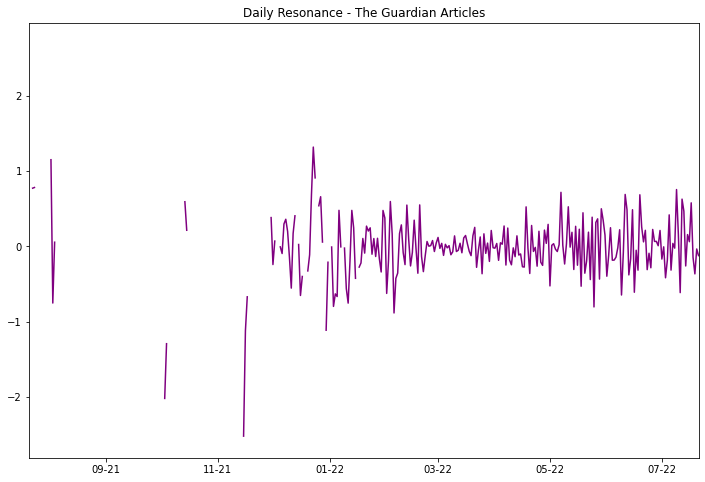

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

beginning = dt.date(2021, 7, 21)
end = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.set(
       #xlabel="Date",
       #ylabel="Resonance",
       title="Daily Resonance - The Guardian Articles")

date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(beginning, end)